# Libraries


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Define color maps for visualization
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
cmap_light = ListedColormap(['#FFBBBB','#BBFFBB','#BBBBFF'])

# Activation Functions

In [3]:
# Activation Functions

def linear(H):
    return H

def ReLU(H):
    return H*(H>0)

def sigmoid(H):
    return 1/(1+np.exp(-H))

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)

# Loss Functions

In [4]:
# Loss Functions

def cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

# Utility Functions

In [5]:
# Utility Functions

def one_hot(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    for i in range(N):
        Y[i,y[i]] = 1
    return Y

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def R2(y,y_hat):
    return 1-np.mean((y-y_hat)**2)/np.sum((y-y.mean())**2)


# Derivatives of Activations

In [6]:
# Derivatives of Activations

def derivative(Z,a):
    if a == linear:
        return 1
    elif a==sigmoid:
        return Z*(1-Z)
    elif a==np.tanh:
        return 1-Z*Z
    elif a==ReLU:
        return (Z>0).astype(int)
    else:
        ValueError("Unknown Activation")

# ANN class

In [7]:
# ANN class

class ANN():
    def __init__(self, architecture, activations=None, mode=0):
        self.mode = mode
        self.architecture = architecture
        self.activations = activations
        self.L = len(architecture) + 1

    def __forward__(self, X):
        # Convert X to a NumPy array to avoid Pandas issues
        X = X.to_numpy()  # Convert Pandas DataFrame to NumPy array
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l - 1] @ self.W[l] + self.B[l])

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        if self.mode:
            Y = y
            K = 1
        else:
            Y = one_hot(y)
            K = Y.shape[1]

        N, D = X.shape

        # Initialize weights and Biases
        self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip(([D] + self.architecture), (self.architecture + [K])), 1)}
        self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}

        # activations
        if self.activations is None:
            self.a = {1: ReLU for l in range(1, self.L)}
        else:
            self.a = {l: act for l, act in enumerate(self.activations, 1)}

        if self.mode:
            self.a[self.L] = linear
        else:
            self.a[self.L] = softmax

        J = np.zeros(epochs)

        # gradient descent/ back propagation
        for epoch in range(epochs):
            self.__forward__(X)
            if self.mode:
                J[epoch] = cross_entropy(Y, self.Z[self.L])  # Use cross_entropy instead of OLS
            else:
                J[epoch] = cross_entropy(Y, self.Z[self.L])

            # Back Propagation
            dH = (1 / N) * (self.Z[self.L] - Y)
            for l in sorted(self.W.keys(), reverse=True):
                dW = self.Z[l - 1].T @ dH
                dB = dH.sum(axis=0)

                self.W[l] -= eta * dW
                self.B[l] -= eta * dB

                if l > 1:
                    dZ = dH @ self.W[l].T
                    dH = dZ * derivative(self.Z[l - 1], self.a[l - 1])

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve')
            plt.show()

    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l - 1] @ self.W[l] + self.B[l])

    def predict(self, X):
        self.__forward__(X)
        if self.mode:
            return self.Z[self.L]
        else:
            return self.Z[self.L].argmax(axis=1)


# Data Analysis

In [8]:
def preprocess_data(data):
    processed_df = data.copy()

    # Convert categorical variables to numeric
    geography_map = {country: idx for idx, country in enumerate(processed_df['Geography'].unique())}
    processed_df['Geography'] = processed_df['Geography'].map(geography_map)

    # Gender
    processed_df['Gender'] = processed_df['Gender'].map({'Male': 1, 'Female': 0})

    # Drop unnecessary columns
    X = processed_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

    # Normalize features
    X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

    return X.to_numpy()


# ANN Classification Logsitic Modeling

Running Classification Example for Bank Churn...
Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


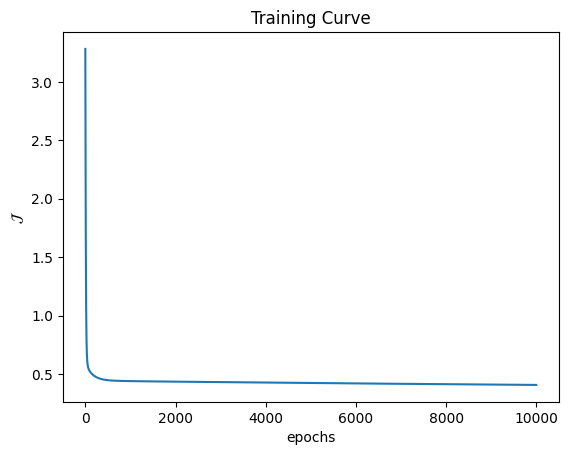


Training Accuracy: 0.8140


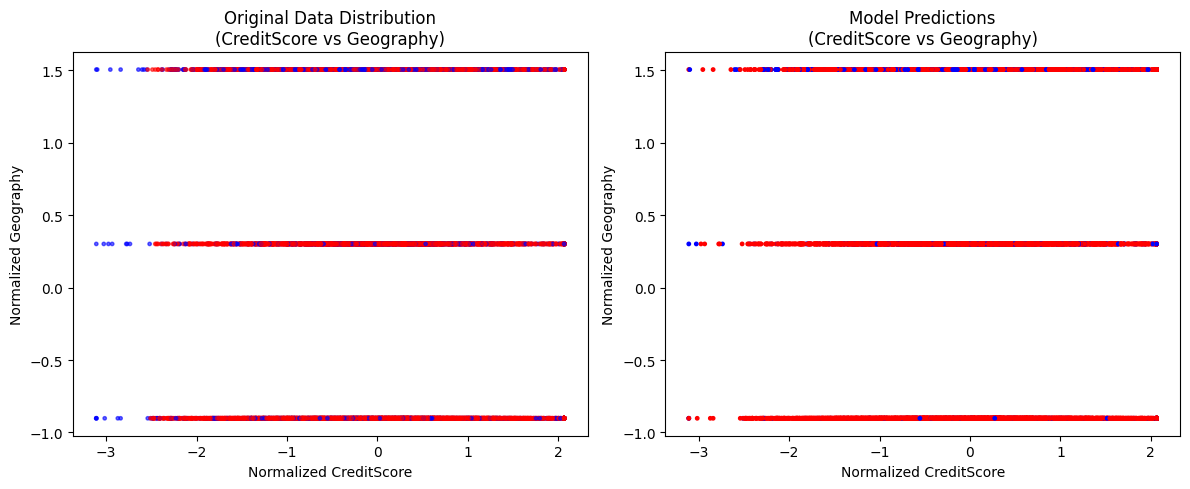

In [11]:

def main_class():

    """Classification implementation for bank churn prediction"""
    print("Running Classification Example for Bank Churn...")

    # Load data
    df = pd.read_csv('/content/drive/MyDrive/Dataset/Churn_Modelling - Churn_Modelling.csv')

    # Check for missing values
    print("Missing Values:")
    print(df.isnull().sum())

    # Preprocess features
    X = preprocess_data(df)
    y = df['Exited'].values

    # Create and train the classifier
    my_ann_classifier = ANN(architecture=[6,4], activations=[np.tanh,ReLU])
    my_ann_classifier.fit(X, y, eta=1e-2, epochs=1e4, show_curve=True)
    y_hat = my_ann_classifier.predict(X)

    # Print results
    print(f"\nTraining Accuracy: {accuracy(y,y_hat):0.4f}")

    # Plot original data distribution (using first two features)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=6, alpha=0.6)
    plt.title('Original Data Distribution\n(CreditScore vs Geography)')
    plt.xlabel('Normalized CreditScore')
    plt.ylabel('Normalized Geography')

    # Plot predictions
    plt.subplot(1, 2, 2)
    plt.scatter(X[:,0], X[:,1], c=y_hat, cmap=cmap_bold, s=6)
    plt.title('Model Predictions\n(CreditScore vs Geography)')
    plt.xlabel('Normalized CreditScore')
    plt.ylabel('Normalized Geography')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main_class()